*Understanding Decision Tree for classification problems*

![](intro_image.JPG)


# Understanding Decision Tree for classification problems

## Introduction
We've already seen how works a decision tree in a regression problem (salary prediction of baseball players) in the previous [notebook](https://jmanuelascacibar.github.io/dsjournal/posts/decision_tree_regressor/). Now, we are going to see how works a decision tree in a classification problem. 

A classification tree is used to predict a categorical response (categorical target variable). As we've seen in regression trees, the prediction is made by the average of the target variable in the region. In the case of classification trees, the prediction is made by the most common class in the region. So the criterion to split the data must be different. Recall that in the regression tree, the criterion was to minimize the sum of squared errors. In the classification tree, we are going to start with the classification error rate, which is the proportion of observations in a region that do not belong to the most common class, and then we are going to see the Gini index and the cross-entropy.

## Classification error rate

An alternative to the RSS for classification trees is the classification error rate. 
The error rate is defined as:

$$E = 1 - \max_k(\hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in the mth region that are from the kth class.

Our task is to find a split that reduce the loss as much as possible. So our objective is to maximize the loss reduction. The loss reduction is defined as:

$$\max_{j,t}(L(R_p) - (L(R_{left}) + L(R_{right})))$$

where $L$ is the loss function, $R_p$ is the parent region, $R_{left}$ and $R_{right}$ are the child regions. So we are going to maximize the loss reduction as much as possible.

The problem with the classification error rate is that it is not sensitive enough for tree-growing. This happens because you can get cases where the change in loss is zero, so the metric is not able to differentiate between different splits. it doesn't see any information gain in the split. 

## Gini index

In order to avoid this problem, we can use the Gini index or entropy. The Gini index is defined as:

$$G = \sum_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in the mth region that are from the kth class. The Gini index is a measure of total variance across the K classes.  The Gini index takes on a small value if all of the $\hat{p}_{mk}$'s are close to zero or one. For this reason, the Gini index is referred to as a measure of node purity. A small value of Gini index indicates that a node contains predominantly observations from a single class.

Let's see how works the Gini index in a classification problem.

We have a dataset with 30 observations and 2 classes. The class A has 10 observation and the class B has 20 observations. 

1. Calculate the proportion of each class for the $R_p$ region.

$$\hat{p}_{a} = \frac{10}{30} =  \frac{1}{3}$$
$$\hat{p}_{b} = \frac{20}{30} = \frac{2}{3}$$

$$G(R_p) = \hat{p}_{a}(1 - \hat{p}_{a}) + \hat{p}_{b}(1 - \hat{p}_{b}) = \frac{1}{3}(1 - \frac{1}{3}) + \frac{2}{3}(1 - \frac{2}{3}) =0.444$$

2. Suppose we split the data into two regions $R_{left}$ and $R_{right}$. The $R_{left}$ region has 10 observations and the $R_{right}$ region has 20 observations. The $R_{left}$ has 5 observations for the class A and 5 observations for the class B. The $R_{right}$ has 5 observations for the class A and 15 observations for the class B. We calculate the Gini index for each region.

$$\hat{p}_{a, left} = \frac{5}{10} = 0.5$$
$$\hat{p}_{b, left} = \frac{5}{10} = 0.5$$
$$\hat{p}_{a, right} = \frac{5}{20} = 0.25$$
$$\hat{p}_{b, right} = \frac{15}{20} = 0.75$$

$$G(R_{left}) = \hat{p}_{a, left}(1 - \hat{p}_{a, left}) + \hat{p}_{b, left}(1 - \hat{p}_{b, left}) = 0.5(1 - 0.5) + 0.5(1 - 0.5) = 0.5$$

$$G(R_{right}) = \hat{p}_{a, right}(1 - \hat{p}_{a, right}) + \hat{p}_{b, right}(1 - \hat{p}_{b, right}) = 0.25(1 - 0.25) + 0.75(1 - 0.75) = 0.375$$

3. We calculate the Gini index for the split as the weighted sum of the Gini index of each region.

$$G(R_{split}) = \frac{10}{30}G(R_{left}) + \frac{20}{30}G(R_{right}) = \frac{1}{3}0.5 + \frac{2}{3}0.375 = 0.417$$

The Gini index for the split is 0.417, which is lower than the Gini index for the parent region. So the split is a good split since the the Gini index has decreased after the split. This indicates that the split has resulted in a purer separation of the classes. We refer as purer separation of the classes to the degree to which the split results in child nodes that are more homogenous with respect to the class labels comprared to the parent node. 

We can also calculate the information gain for the split as the difference between the Gini index of the parent region and the Gini index of the split.

$$IG = G(R_p) - G(R_{split}) = 0.444 - 0.417 = 0.027$$

A positive value of the information gain indicates that the split has resulted in a purer separation of the classes. In other words, the split has resulted in child nodes that are more homogenous with respect to the class labels compared to the parent node, hence has reduce impurity.

## Entropy

Entropy is another measure of impurity used in decision trees. The entropy is defined as:

$$D = -\sum_{k=1}^{K}\hat{p}_{mk}\log(\hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in the mth region that are from the kth class. Given that $\hat{p}_{mk}$ represent proportions, it follows $0 \leq \hat{p}_{mk} \leq 1$. When $\hat{p}_{mk} = 0$, the term $\hat{p}_{mk}\log(\hat{p}_{mk})$ is defined to be 0. When $\hat{p}_{mk} = 1$, the term $\hat{p}_{mk}\log(\hat{p}_{mk})$ is also defined to be 0. The term $\hat{p}_{mk}\log(\hat{p}_{mk})$ will be a positive number reaching the maximum value when $\hat{p}_{mk} = 0.5$. 

In other words the entropy will be near zero if the proportions $\hat{p}_{mk}$ are either very close to 0 or very close to 1. This basically corresponde to the node being pure. Both the Gini index and the entropy are measures of impurity, and both take on small values for a node that is pure.

Here again a brief comparison between the Gini index and the entropy:
$$G = \sum_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$$
Takes a value of 0 when the node is pure. Increases as the node becomes more mixed.
$$D = -\sum_{k=1}^{K}\hat{p}_{mk}\log(\hat{p}_{mk})$$
Takes a value of 0 when the node is pure. Increases as the node becomes more mixed.


## Conclusion

When we are building a decision tree for a classification problem, the goal is to find splits that create the most homogenous child nodes possible. To evaluate the quality of these splits, we use measure of impurity. The Gini index and the entropy are two common measures of impurity sensitive to changes in the node purity. They are able to differentiate between nodes with mixed classes and those that are more homogenous. The classification error rate is not sensitive enough to changes in node purity because it only considers the majority class and ignores the distribution of minority classes. In the case that the goal is precision, the classification error rate can be a good metric because it's more aligned with the prediction metric.

# Heart failure prediction with a decision tree

We are going to put into practice the concepts we've seen in the previous section. We are going to build a decision tree to predict heart failure. This dataset has been downloaded from Kaggle. You can use the Kaggle API (`kaggle datasets download -d andrewmvd/heart-failure-clinical-data`) to download the dataset.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

## Data

In [11]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [13]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Target classes

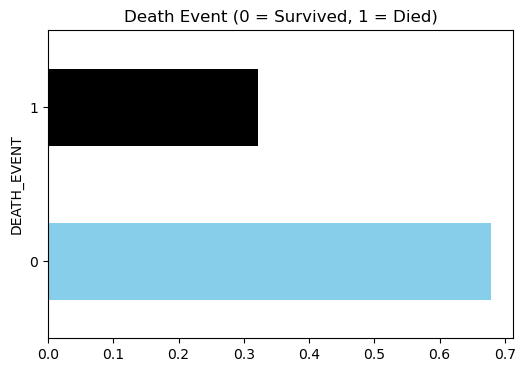

In [21]:
# balance of classes
plt.figure(figsize=(6, 4))
data.DEATH_EVENT.value_counts(normalize=True).plot(kind='barh', color=['skyblue', 'black'])
plt.title('Death Event (0 = Survived, 1 = Died)')
plt.show()

In [23]:
# split the data into features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

## Baseline decision tree

In [31]:
# model scores
scores = []
# cross-validation function
def cross_val(model):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for f, (idx_t, idx_v) in enumerate(skf.split(X, y)):
        X_t = X.iloc[idx_t]
        X_v = X.iloc[idx_v]
        y_t = y.iloc[idx_t]
        y_v = y.iloc[idx_v]

        model.fit(X_t, y_t)
        preds = model.predict(X_v)
        score = accuracy_score(y_v, preds)
        scores.append(score)
        print(f'Fold {f+1}, Accuracy: {score}')
    print(f'Mean Accuracy: {np.mean(scores)} ± {np.std(scores)}')

cross_val(DecisionTreeClassifier(random_state=42))


Fold 1, Accuracy: 0.75
Fold 2, Accuracy: 0.8333333333333334
Fold 3, Accuracy: 0.7666666666666667
Fold 4, Accuracy: 0.7166666666666667
Fold 5, Accuracy: 0.6949152542372882
Mean Accuracy: 0.7523163841807909 ± 0.047625275580747764


## Cost complexity pruning

In [29]:
# prune the tree
model = DecisionTreeClassifier(random_state=42)
ccp_path = model.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid={'ccp_alpha': ccp_alphas}, cv=skf, scoring='accuracy')
G = grid.fit(X, y)
grid.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.011683845180236234, random_state=42)

In [30]:
grid.best_params_

{'ccp_alpha': 0.011683845180236234}

In [33]:
cross_val(grid.best_estimator_)

Fold 1, Accuracy: 0.9
Fold 2, Accuracy: 0.8666666666666667
Fold 3, Accuracy: 0.8
Fold 4, Accuracy: 0.7333333333333333
Fold 5, Accuracy: 0.847457627118644
Mean Accuracy: 0.7780414312617702 ± 0.06289004959053998


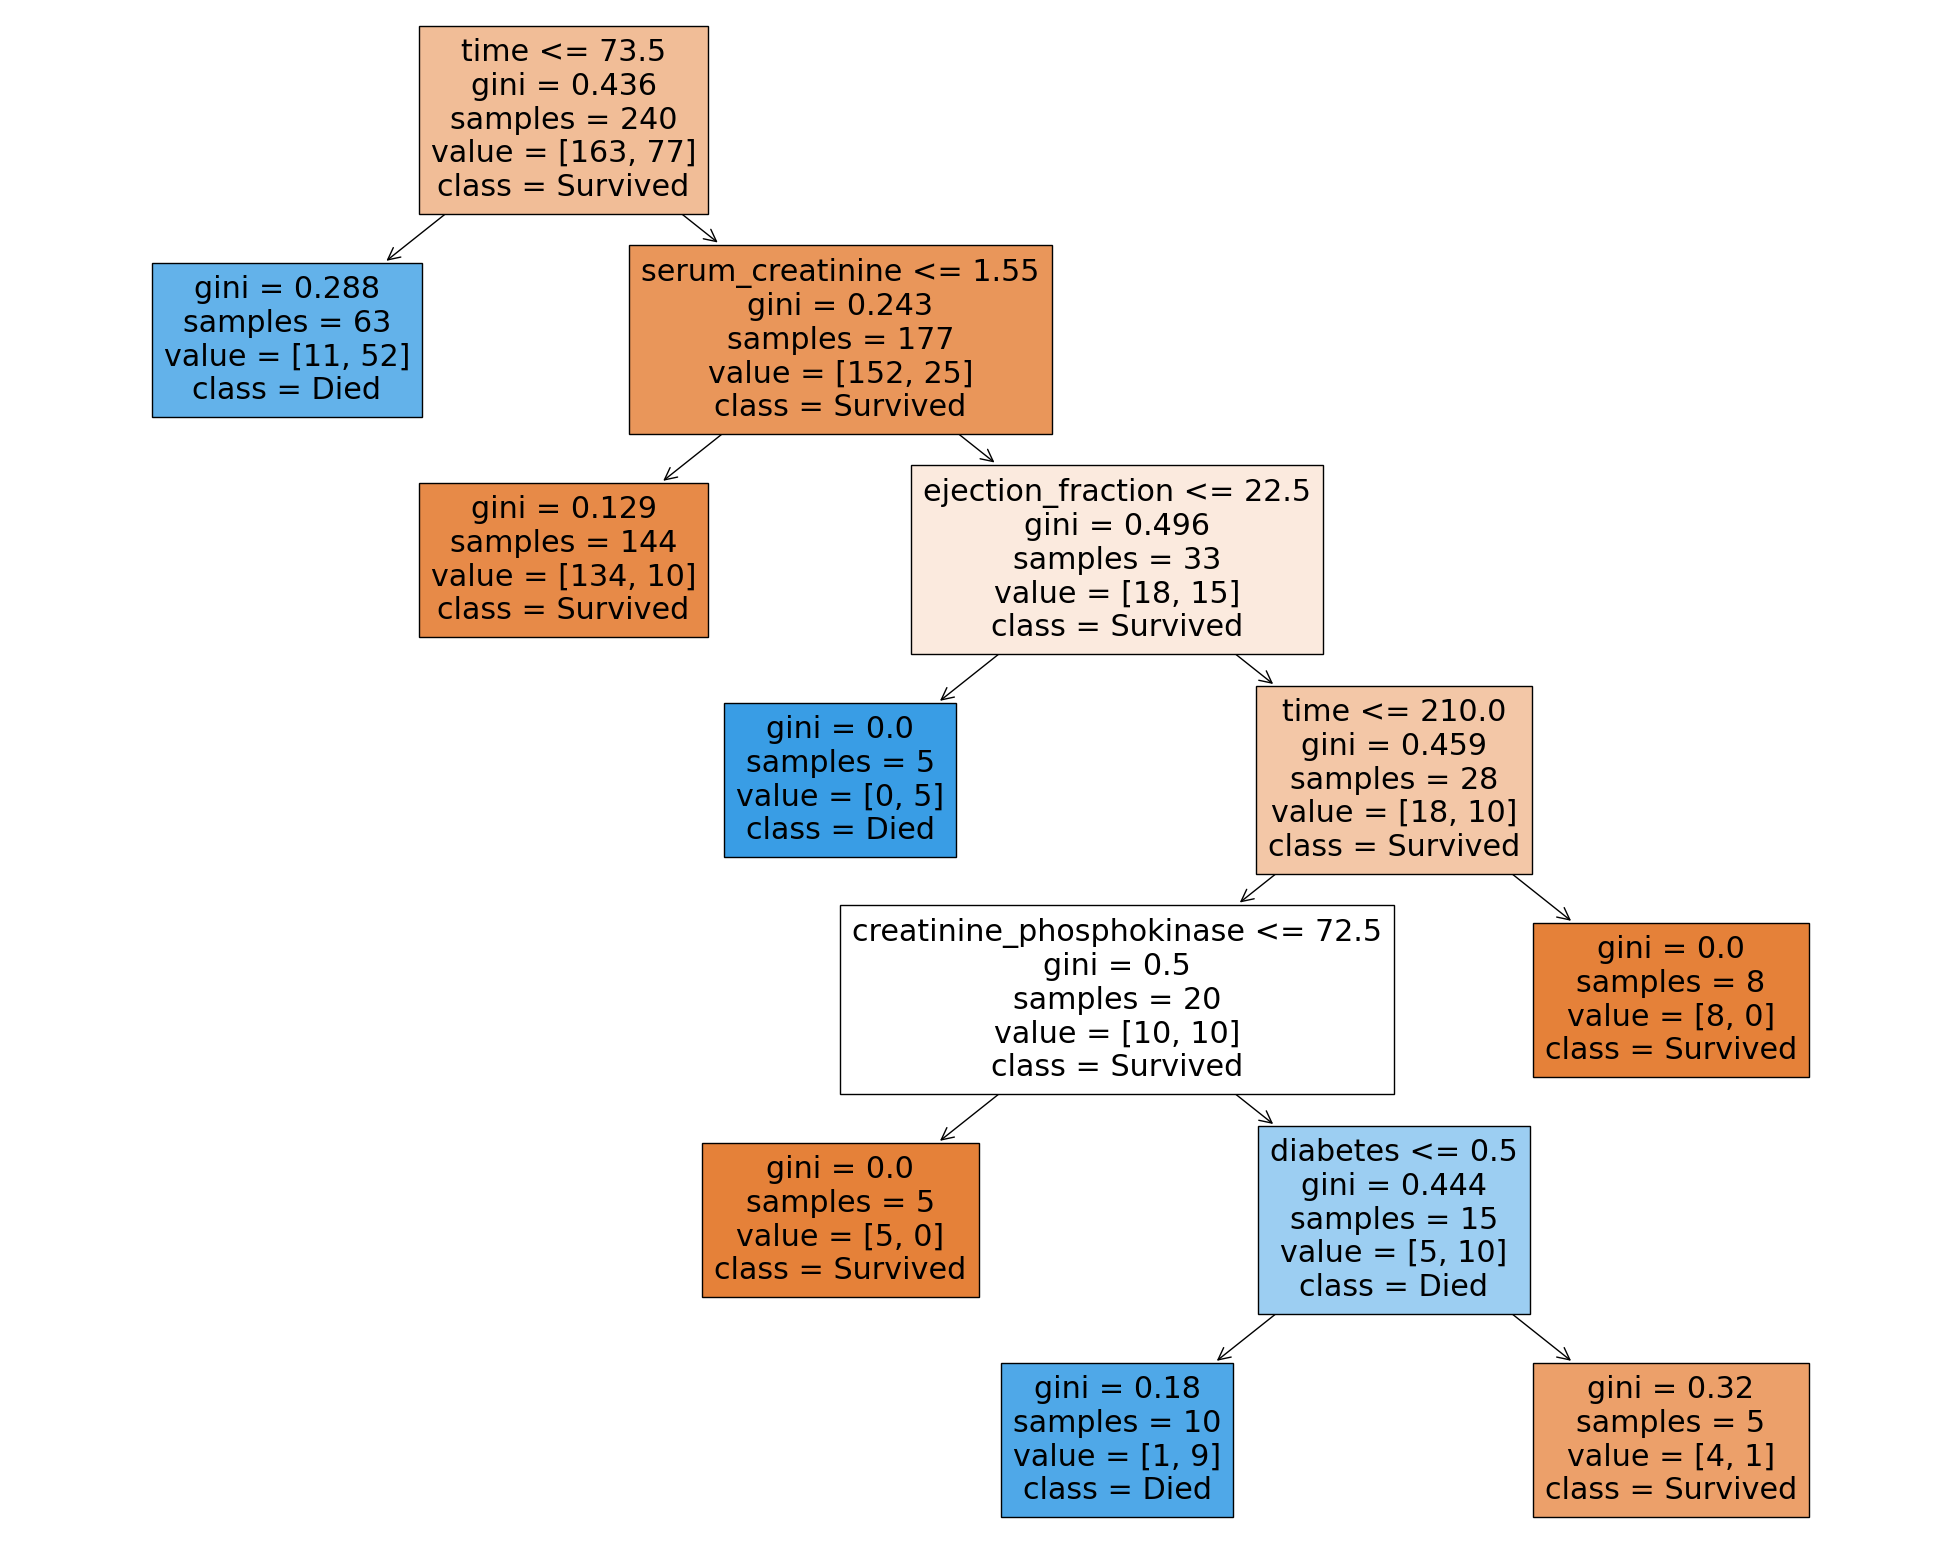

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 20))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['Survived', 'Died'])
plt.show()

# Resourses

- [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
- [Lecture 10 - Decision Trees and Ensemble Methods | Stanford University](https://www.youtube.com/watch?v=wr9gUr-eWdA)
- [Heart Failure Prediction | Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)